Warning message in install.packages("units"):
“installation of package ‘units’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [44]:
# install.packages('units')
#install.packages("sf")
#library(sf)
install.packages('ggmap')
library(ggmap)
library(ggplot2)

also installing the dependencies ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘jpeg’, ‘bitops’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [3]:
system('gzip -d data/output/output_events.xml.gz')

In [2]:
raw <- scan('data/output/output_events.xml',what='character',sep='\n')

In [16]:
# better vis trips
system('gzip -d data/output/output_trips.csv.gz')
trips <- read.csv('data/output/output_trips.csv',sep=';')

In [33]:
#start = st_as_sf(trips[,c("start_x","start_y")],coords = 1:2)
#st_crs(start)<-4326
#end = st_as_sf(trips[,c("end_x","end_y")],coords = 1:2)
#st_crs(end)<-4326
trips$times = sapply(strsplit(as.character( trips$trav_time),":"),function(t){as.numeric(t[3])+as.numeric(t[2])*60+as.numeric(t[1])*3600})
trips$start = sapply(strsplit(as.character( trips$dep_time),":"),function(t){as.numeric(t[3])+as.numeric(t[2])*60+as.numeric(t[1])*3600})


In [58]:
coords = data.frame(lon=c(),lat=c(),time=c(),start=c())
for(i in 1:nrow(trips)){
    coords = rbind(coords,data.frame(
        lon=c(trips[i,"start_x"],trips[i,"end_x"],NA),
        lat=c(trips[i,"start_y"],trips[i,"end_y"],NA),
        time=c(trips[i,"times"],trips[i,"times"],NA),
        start=c(trips[i,"start"],trips[i,"start"],NA)         
                  ))
}

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

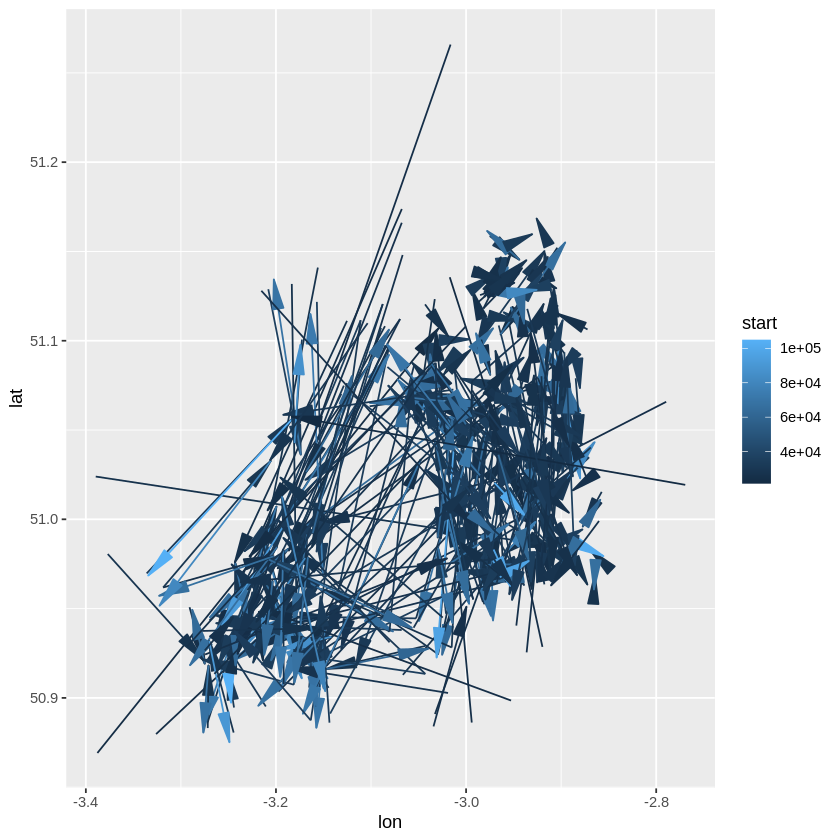

In [59]:
g=ggplot(coords,aes(x=lon,y=lat,color=start))
g+geom_path(arrow=arrow(angle = 10,type='closed'))

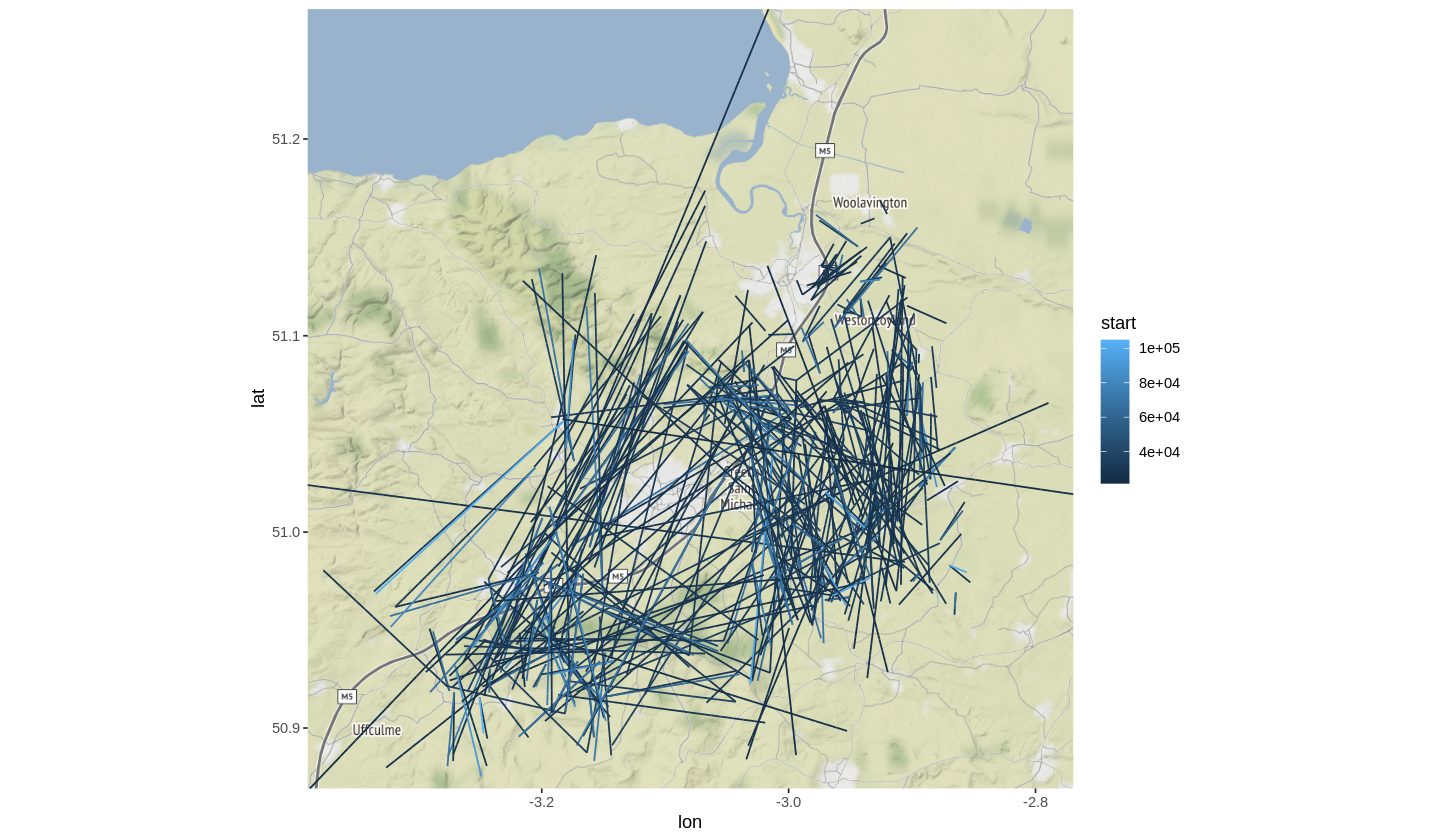

In [67]:
# note: to use osm, requires bbox
options(repr.plot.width=12, repr.plot.height=7)
map <- get_map(location = c(min(coords$lon,na.rm = T),  min(coords$lat,na.rm=T),max(coords$lon,na.rm = T),  max(coords$lat,na.rm=T)), 
               source = "osm")
mapPoints <- ggmap(map)
mapPoints +geom_path(
    data=coords[1:(nrow(coords)-1),],
    aes(lon,lat,color=start)#,
    #arrow=arrow(angle = 10,type='closed')
)

In [ ]:
#dim(trips)
#names(trips)
#head(coords)
#names(coords)
#summary(coords)
min(coords$x,na.rm = T),  min(coords$y,na.rm=T),max(coords$x,na.rm = T),  max(coords$y,na.rm=T)

In [45]:
# system('cat data/output/output_events.xml  | grep "x="')
#help(system)
#help(arrow)
help(get_map)

get_map {ggmap},R Documentation
location,"an address, longitude/latitude pair (in that order), or left/bottom/right/top bounding box"
zoom,"map zoom, an integer from 3 (continent) to 21 (building), default value 10 (city). openstreetmaps limits a zoom of 18, and the limit on stamen maps depends on the maptype. ""auto"" automatically determines the zoom for bounding box specifications, and is defaulted to 10 with center/zoom specifications. maps of the whole world currently not supported."
scale,scale argument of get_googlemap or get_openstreetmap
maptype,"character string providing map theme. options available are ""terrain"", ""terrain-background"", ""satellite"", ""roadmap"", and ""hybrid"" (google maps), ""terrain"", ""watercolor"", and ""toner"" (stamen maps), or a positive integer for cloudmade maps (see ?get_cloudmademap)"
source,"Google Maps (""google""), OpenStreetMap (""osm""), Stamen Maps (""stamen"")"
force,force new map (don't use archived version)
messaging,turn messaging on/off
urlonly,return url only
filename,destination file for download (file extension added according to format). Default NULL means a random tempfile.
crop,(stamen and cloudmade maps) crop tiles to bounding box
